In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
wine_data = pd.read_csv("../datasets/winequality-red.csv")
wine_data.info()
wine_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [47]:
wine_data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

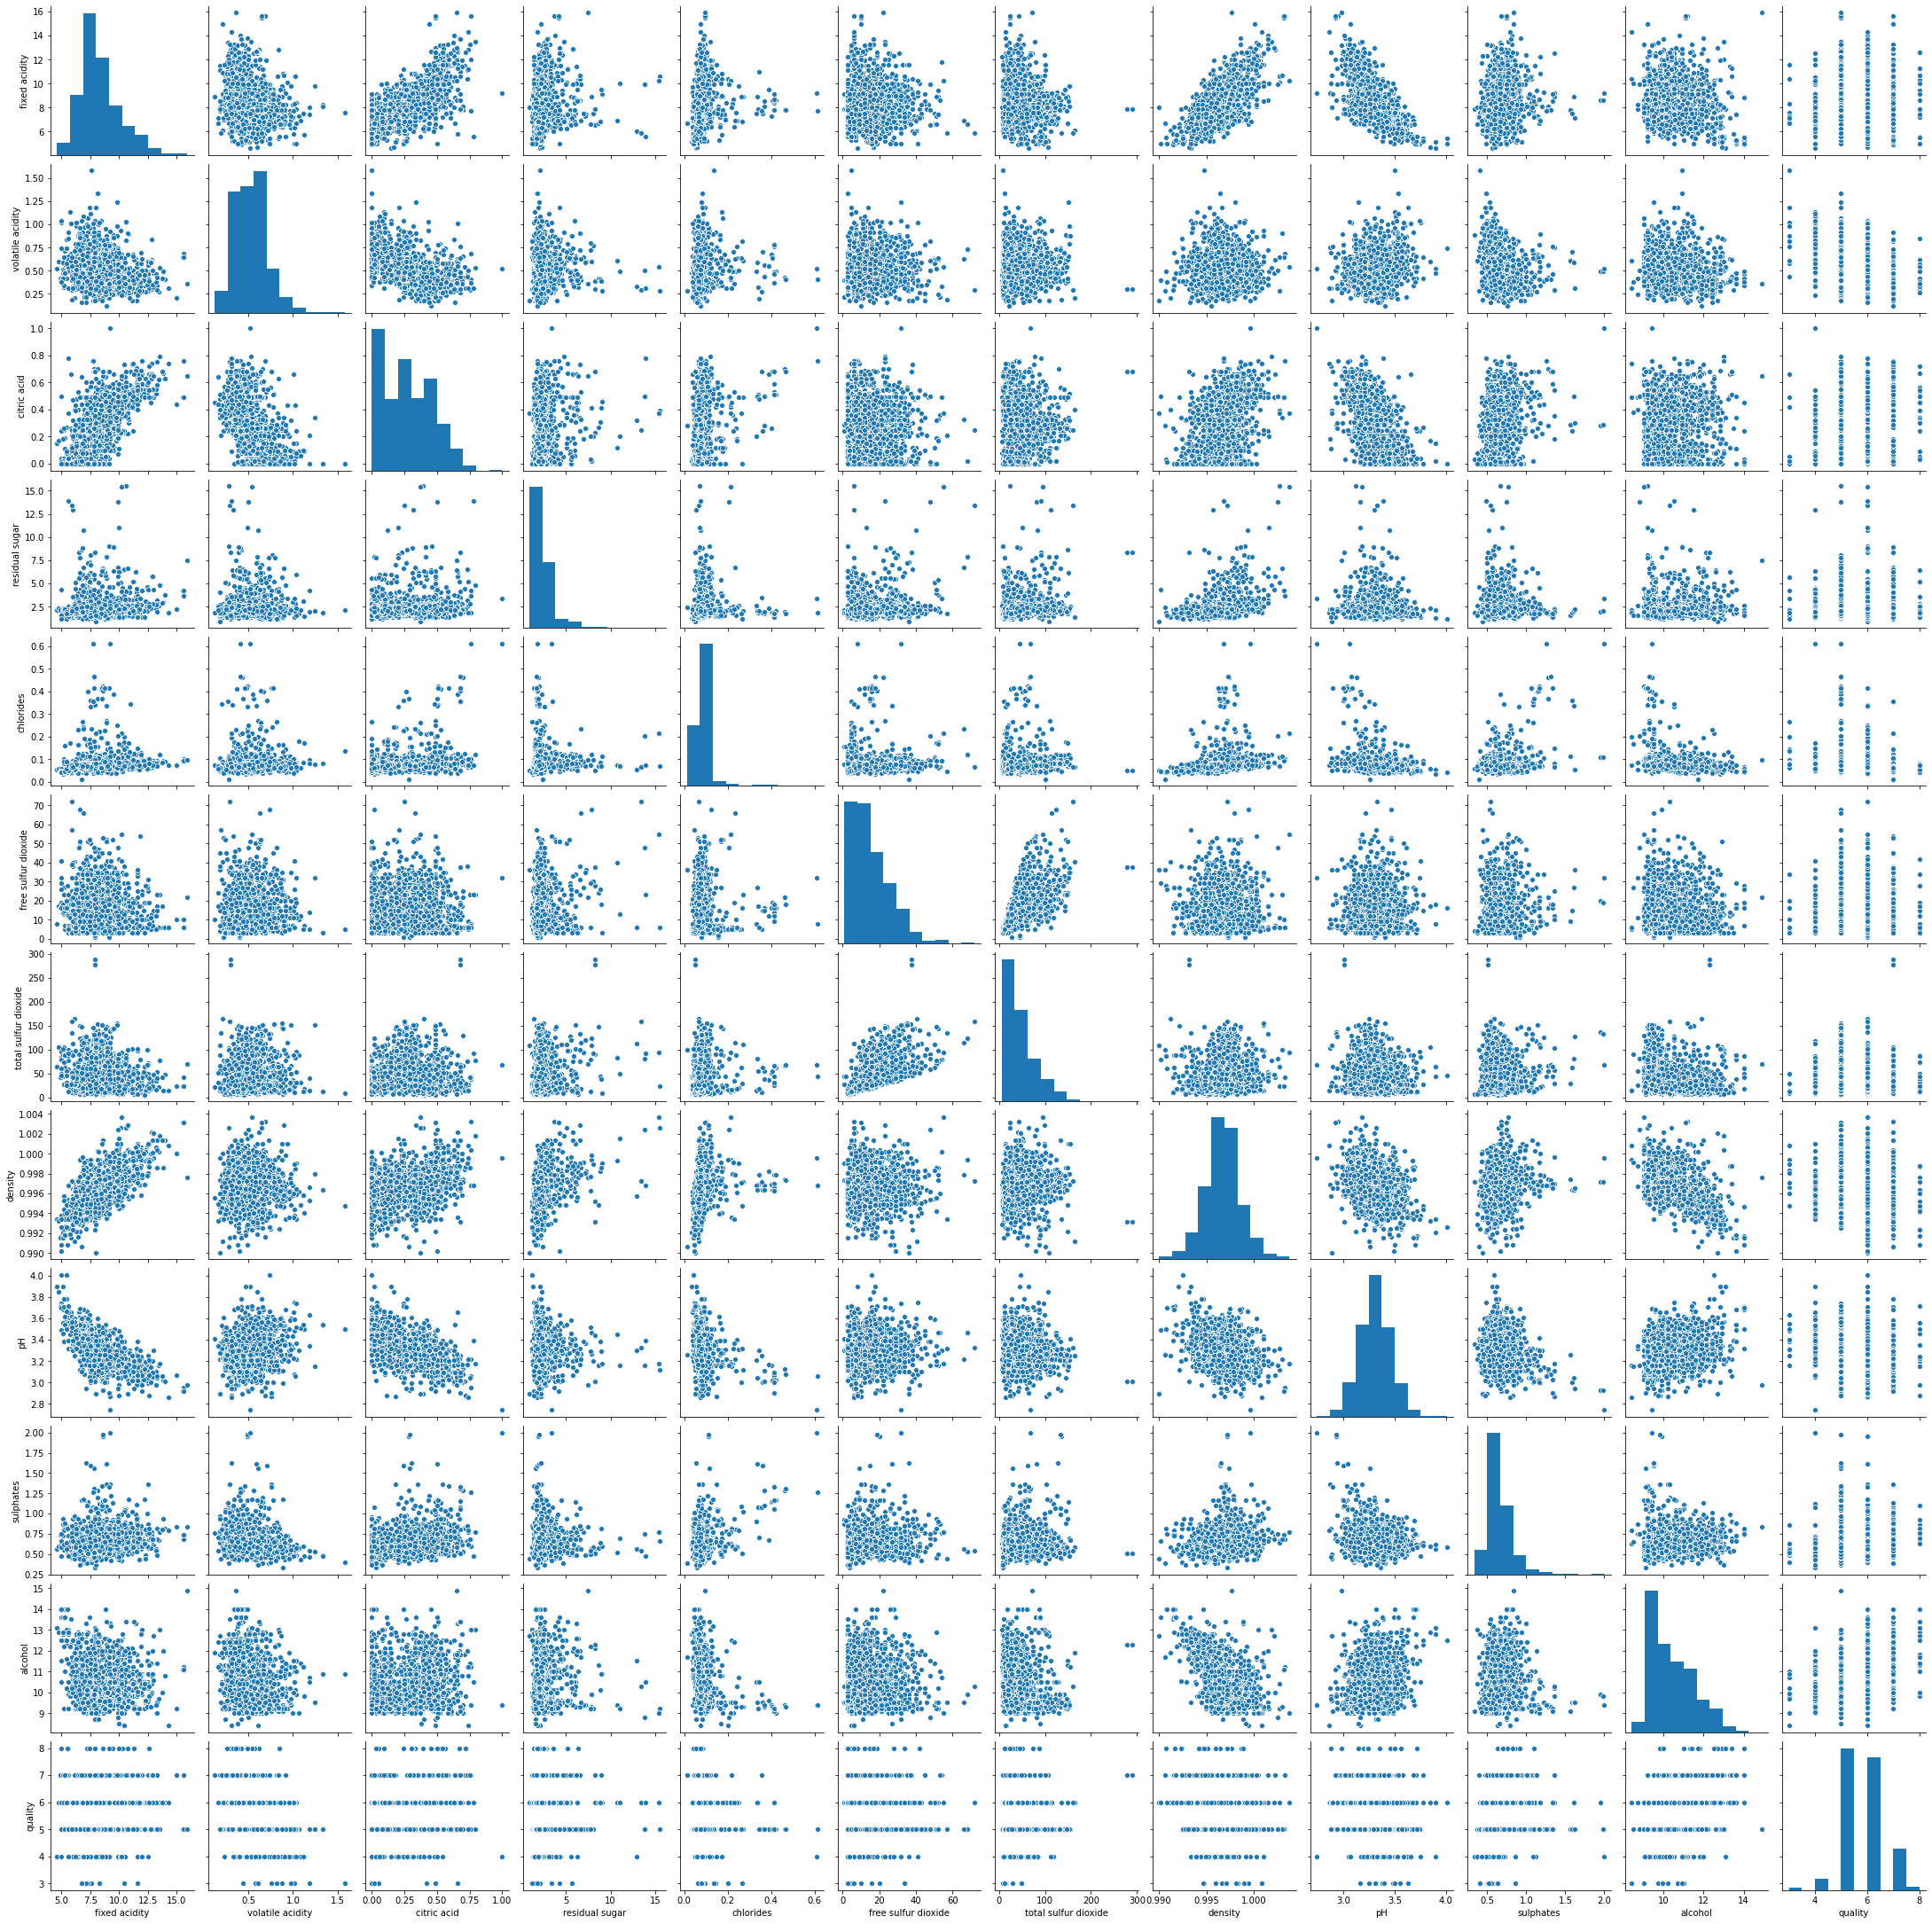

In [48]:
## Checking for correlations
sns.pairplot(wine_data)

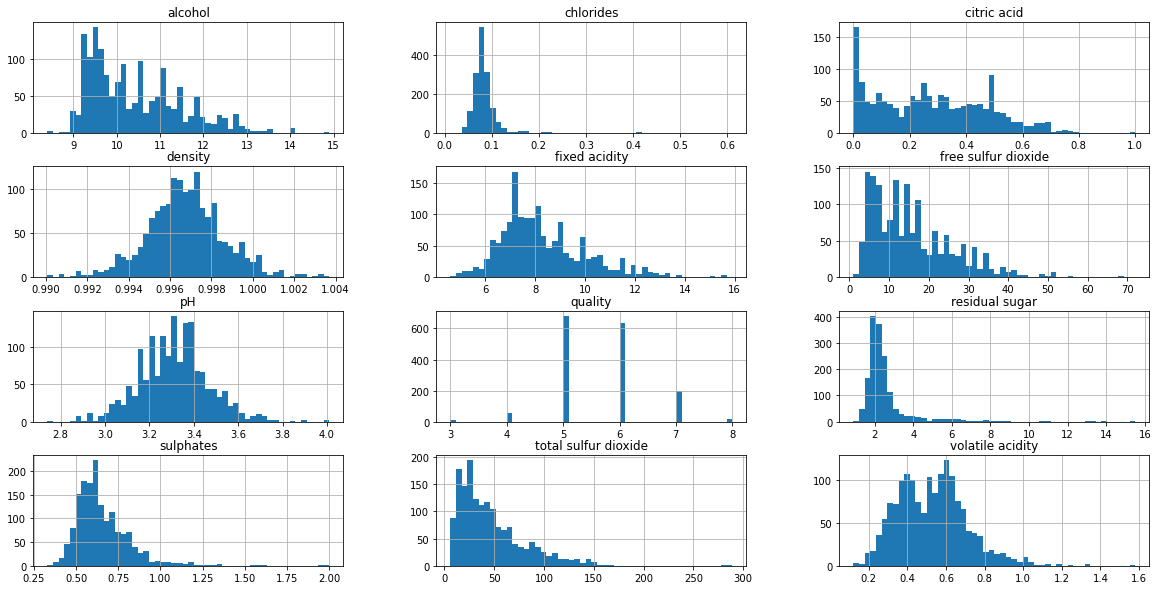

In [49]:
## Checking for outliers
%matplotlib inline
wine_data.hist(bins = 50, figsize =(20,10))
plt.show()

In [50]:
test = wine_data.quality
train = wine_data.drop('quality',axis = 1,inplace=False)

train_cols = train.columns
test_cols = 'quality'

print(train_cols)
print(test_cols)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
quality


In [14]:
## Checking for outliers
from scipy import stats

for col in train_cols:
    wine_data['z_score'] = stats.zscore(wine_data[col])
    print(col, ' Outliers:')
    print('Count: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].count())
    print('Mean: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].mean())
    print('Min: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].min())
    print('Max: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].max())
    print('Median: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].median())
    
    print(col, ' Non Outliers:')
    print('Count: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].count())
    print('Mean: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].mean())
    print('Min: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].min())
    print('Max: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].max())
    print('Median: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].median())
    print('-------------------------------')

fixed acidity  Outliers:
Count:  12
Mean:  14.799999999999999
Min:  13.7
Max:  15.9
Median:  15.0
fixed acidity  Non Outliers:
Count:  1587
Mean:  8.270636420920003
Min:  4.6
Max:  13.5
Median:  7.9
-------------------------------
volatile acidity  Outliers:
Count:  10
Mean:  1.225
Min:  1.07
Max:  1.58
Median:  1.1825
volatile acidity  Non Outliers:
Count:  1589
Mean:  0.5234329767149153
Min:  0.12
Max:  1.04
Median:  0.52
-------------------------------
citric acid  Outliers:
Count:  1
Mean:  1.0
Min:  1.0
Max:  1.0
Median:  1.0
citric acid  Non Outliers:
Count:  1598
Mean:  0.2705193992490602
Min:  0.0
Max:  0.79
Median:  0.26
-------------------------------
residual sugar  Outliers:
Count:  30
Mean:  10.010000000000002
Min:  7.0
Max:  15.5
Median:  8.7
residual sugar  Non Outliers:
Count:  1569
Mean:  2.3959528362014018
Min:  0.9
Max:  6.7
Median:  2.2
-------------------------------
chlorides  Outliers:
Count:  31
Mean:  0.3643225806451612
Min:  0.23
Max:  0.611
Median:  0.368
chl

In [57]:
## <5% outliers can be dropped

for col in train_cols:
    wine_data['z_score'] = stats.zscore(wine_data[col])
    wine_data.drop(wine_data.loc[wine_data['z_score'] > 3].index, axis =0, inplace = True)
    print(col, ' Outliers:')
    print('Count: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].count())
    print('Mean: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].mean())
    print('Min: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].min())
    print('Max: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].max())
    print('Median: ',wine_data[col].loc[wine_data['z_score'].abs() >= 3].median())
    
    print(col, ' Non Outliers:')
    print('Count: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].count())
    print('Mean: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].mean())
    print('Min: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].min())
    print('Max: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].max())
    print('Median: ',wine_data[col].loc[wine_data['z_score'].abs() < 3].median())
    print('-------------------------------')

fixed acidity  Outliers:
Count:  0
Mean:  nan
Min:  nan
Max:  nan
Median:  nan
fixed acidity  Non Outliers:
Count:  1587
Mean:  8.270636420920003
Min:  4.6
Max:  13.5
Median:  7.9
-------------------------------
volatile acidity  Outliers:
Count:  0
Mean:  nan
Min:  nan
Max:  nan
Median:  nan
volatile acidity  Non Outliers:
Count:  1577
Mean:  0.523966391883323
Min:  0.12
Max:  1.04
Median:  0.52
-------------------------------
citric acid  Outliers:
Count:  0
Mean:  nan
Min:  nan
Max:  nan
Median:  nan
citric acid  Non Outliers:
Count:  1576
Mean:  0.2691878172588821
Min:  0.0
Max:  0.79
Median:  0.26
-------------------------------
residual sugar  Outliers:
Count:  0
Mean:  nan
Min:  nan
Max:  nan
Median:  nan
residual sugar  Non Outliers:
Count:  1547
Mean:  2.3908209437621197
Min:  0.9
Max:  6.7
Median:  2.2
-------------------------------
chlorides  Outliers:
Count:  0
Mean:  nan
Min:  nan
Max:  nan
Median:  nan
chlorides  Non Outliers:
Count:  1515
Mean:  0.08132409240924046
Min:

In [58]:
wine_data.drop('z_score',axis = 1, inplace = True)
test = wine_data.quality
train = wine_data[train_cols]

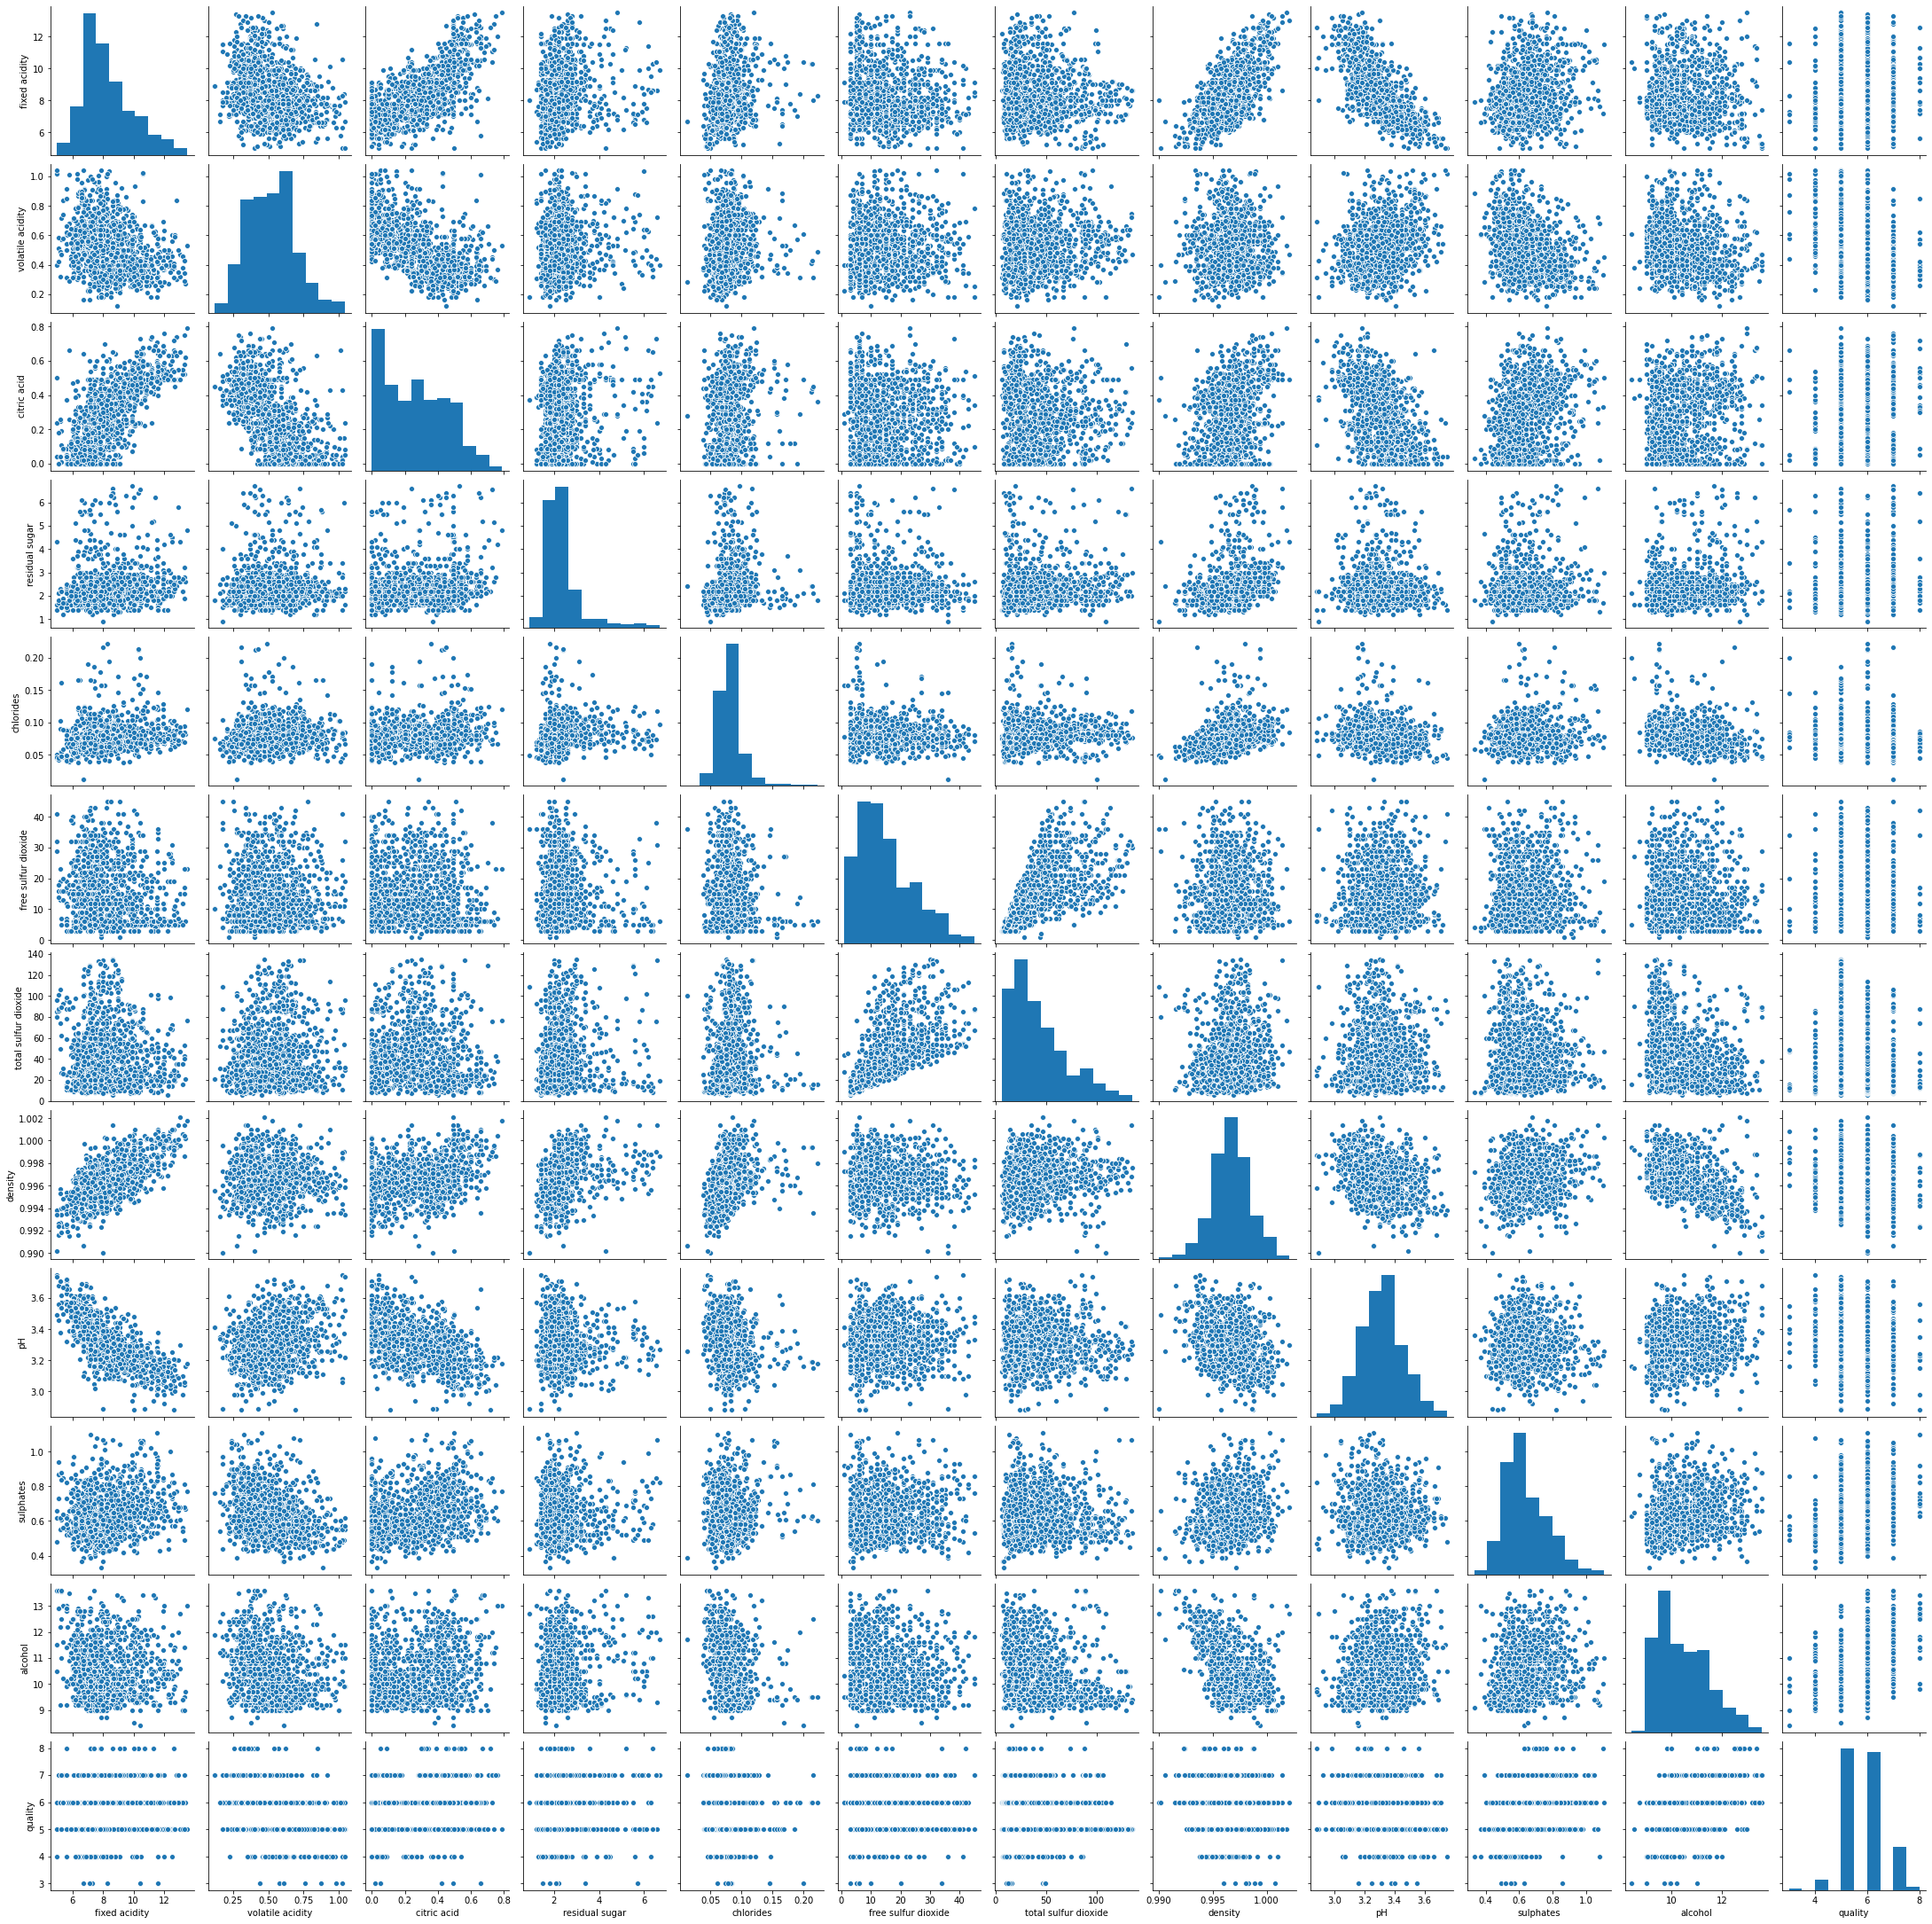

In [27]:
sns.pairplot(wine_data)

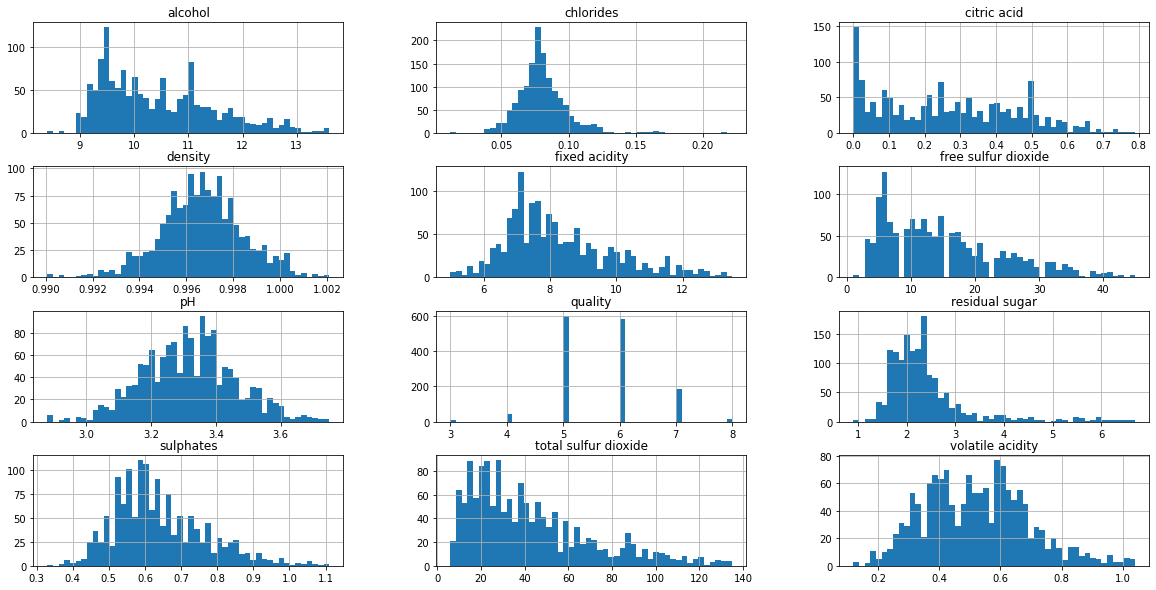

In [28]:
%matplotlib inline
wine_data.hist(bins = 50, figsize = (20,10))
plt.show()

In [59]:
##preprocessing data for training
from sklearn.preprocessing import MinMaxScaler

train  = pd.DataFrame(MinMaxScaler().fit_transform(train),columns = train_cols) 

In [60]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(train,test,test_size = 0.20,random_state = 42)

In [61]:

# Models to try

# 1. Logistic Regression
# 2. SGD Classifier
# 3. Random Forest
# 4. SVC
# 5. KNN

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
print(cross_val_score(sgd_clf,X_train,y_train,cv = 5).mean())

0.560790513833992


In [62]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
print(cross_val_score(log_clf,X_train,y_train,cv = 5).mean())

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.5997816676077545


C:\Users\apurv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apurv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
print(cross_val_score(rf_clf,X_train,y_train,cv = 5).mean())
print(cross_val_score(rf_clf,X_train,y_train,cv = 10).mean())

0.6753284396762658


C:\Users\apurv\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.6857496251874062


In [64]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train,y_train)
print(cross_val_score(svc_clf,X_train,y_train,cv = 5).mean())

0.6284697910784868


In [77]:
100*wine_data.quality.value_counts()/len(wine_data)


5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [79]:
bins = (0,4.9,5.9,6.9, 10)
group_names = ['<5', '5','6','>6']
wine_data['quality_new'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [80]:
100*wine_data.quality_new.value_counts()/len(wine_data)

5     42.589118
6     39.899937
>6    13.570982
<5     3.939962
Name: quality_new, dtype: float64

In [ ]:
100*Y_train.quality_new.value_counts()/len(wine_data)